In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [2]:
wd = "../../"
bench_results = f"{wd}/benchmarks/data/output/load/report.tsv"

tool_pretty_names = {
    "cooler_cool": "cooler",
    "hictk_cool": "hictk (cooler)",
    "hictk_hic": "hictk (hic)",
    "hictools_hic": "hictools",
}

resolutions_pretty = {
    10: "10",
    100: "100",
    500: "500",
    1000: "1k",
    5000: "5k",
    10000: "10k",
    25000: "25k",
    50000: "50k",
    100000: "100k",
    250000: "250k",
    500000: "500k",
    1000000: "1M",
    2500000: "2.5M",
    5000000: "5M",
}

color_palette = ["cornflowerblue", "forestgreen", "orange", "blueviolet"]


matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 17, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [3]:
def import_data(path) -> pd.DataFrame:
    df = pd.read_table(path)
    df["time_min"] = df["time"] / 60  # sec -> min
    df["memory_gb"] = df["memory"] / 1.0e6  # kb -> gb
    df["tool"] = (df["tool"] + "_" + df["format"]).map(tool_pretty_names)
    df["resolution_pretty"] = df["resolution"].map(resolutions_pretty)

    return df.sort_values(["resolution", "tool"])

In [4]:
df = import_data(bench_results)
df

,tool,format,resolution,cpus,time,memory,size,time_min,memory_gb,resolution_pretty
4,cooler,cool,10,1,37932.17,758648760,17182191751,632.202833,758.648760,10
58,cooler,cool,10,1,35753.27,758618160,17182191751,595.887833,758.618160,10
112,cooler,cool,10,1,36102.95,758636996,17182191751,601.715833,758.636996,10
13,hictk (cooler),cool,10,1,10600.60,12831880,17497429866,176.676667,12.831880,10
67,hictk (cooler),cool,10,1,10915.45,12831708,17497429866,181.924167,12.831708,10
...,...,...,...,...,...,...,...,...,...,...
37,hictools,hic,100000,16,21859.92,3173736,630851844,364.332000,3.173736,100k
90,hictools,hic,100000,1,21190.10,3493796,630851844,353.168333,3.493796,100k
91,hictools,hic,100000,16,21742.00,3536456,630851844,362.366667,3.536456,100k
144,hictools,hic,100000,1,21545.13,3551148,630851844,359.085500,3.551148,100k


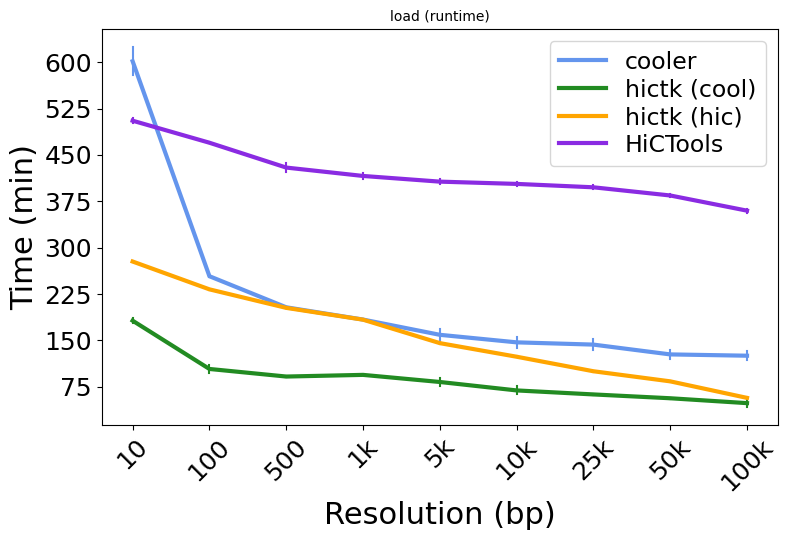

In [5]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5.5))

sns.lineplot(
    df,
    x="resolution_pretty",
    y="time_min",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax1,
    linewidth=3,
    seed=123456,
    legend=True,
)

ax1.set(title="load (runtime)", ylabel="Time (min)", xlabel="Resolution (bp)")

ax1.tick_params(axis="x", rotation=45)

ax1.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cool)"),
        Line2D([0], [0], color=color_palette[2], lw=3, label="hictk (hic)"),
        Line2D([0], [0], color=color_palette[3], lw=3, label="HiCTools"),
    ],
    labelspacing=0.2,
    loc="upper right",
)

loc1 = plticker.MultipleLocator(base=75)
ax1.yaxis.set_major_locator(loc1)

fig.tight_layout()
fig.savefig("/tmp/load_runtime.png", dpi=600)
fig.savefig("/tmp/load_runtime.svg")

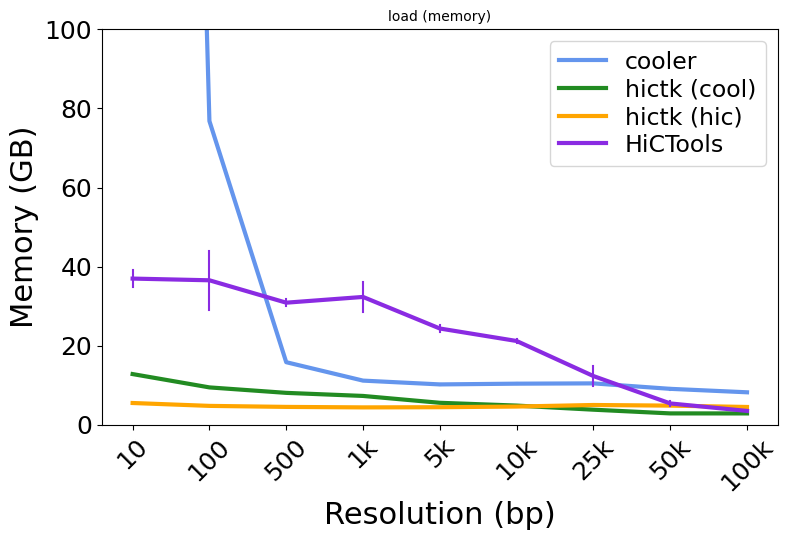

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))


sns.lineplot(
    df,
    x="resolution_pretty",
    y="memory_gb",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax,
    linewidth=3,
    seed=123456,
    legend=False,
)

ax.set(title="load (memory)", ylabel="Memory (GB)", xlabel="Resolution (bp)")

ax.tick_params(axis="x", rotation=45)

ax.set_ylim(0, 100)

ax.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cool)"),
        Line2D([0], [0], color=color_palette[2], lw=3, label="hictk (hic)"),
        Line2D([0], [0], color=color_palette[3], lw=3, label="HiCTools"),
    ],
    labelspacing=0.2,
)

loc = plticker.MultipleLocator(base=20)

ax.yaxis.set_major_locator(loc)

fig.tight_layout()
fig.savefig("/tmp/load_memory.png", dpi=600)
fig.savefig("/tmp/load_memory.svg")